# Big Ideas Final Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Criteria for finding best neighborhood

4 main categories:
- Fire
- Crime
- Affordablity
- Mobility


In [5]:
# Weights for each category (custom per user)
weights = {
    "fire": 0.10,
    "affordability": 0.30,
    "crime": 0.30,
    "mobility": 0.30
}


In [6]:
# Neighborhoods
nb_data = pd.read_csv("./neighborhoods.csv", low_memory=False)

nb_data.columns



Index(['_id', 'objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'pghdb_sde_neighborhood_2010_area', 'perimeter',
       'neighbor', 'neighbor_i', 'hood', 'hood_no', 'acres', 'sqmiles',
       'dpwdiv', 'unique_id', 'sectors', 'shape_le_1', 'shape_ar_1',
       'page_number', 'plannerassign', 'globalid', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'temp',
       'shape_area', 'shape_length'],
      dtype='object')

In [12]:
neighborhoods = nb_data["hood"].unique()

In [27]:
len(neighborhoods)

90

# Fire Data

In [8]:
fire_data = pd.read_csv("./fire-data.csv")


In [ ]:
# Columns
fire_data.columns

Lets see 

In [9]:
fire_nbs = fire_data["neighborhood"].unique()[1:]
fire_nbs

array(['Fineview', 'Fairywood', 'South Side Flats', 'Allegheny Center',
       'Lincoln-Lemington-Belmar', 'Carrick', 'Beechview', 'Allentown',
       'Beltzhoover', 'Crafton Heights', 'Homewood North',
       'Squirrel Hill South', 'Perry North', 'Bedford Dwellings',
       'Homewood South', 'East Allegheny', 'Crawford-Roberts', 'Sheraden',
       'Middle Hill', 'Strip District', 'East Hills', 'Garfield',
       'Greenfield', 'North Shore', 'Spring Hill-City View',
       'Central Business District', 'Upper Hill', 'Manchester',
       'Overbrook', 'Polish Hill', 'Central Lawrenceville', 'Brookline',
       'Marshall-Shadeland', 'North Oakland', 'South Oakland',
       'Homewood West', 'East Liberty', 'Hazelwood',
       'Squirrel Hill North', 'Friendship', 'West Oakland',
       'Terrace Village', 'Brighton Heights', 'Troy Hill', 'Windgap',
       'Knoxville', 'Upper Lawrenceville', 'Arlington', 'Elliott',
       'South Side Slopes', 'Bloomfield', 'Perry South',
       'Central Norths

In [23]:
# Filter out confined fires (smaller fires)
fire_data = fire_data[fire_data["type_description"].str.contains("confined")==False]

In [13]:
# Load population data

pop_data = pd.read_csv("./population-data.csv")
pop_data.columns

Index(['_id', 'Neighborhood', '2010_Total_Population',
       '2010_OneRace_Population', '2010_White_Alone_Population',
       '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population',
       'Change_2010_to_20

In [19]:
# Getting number of fire incidents per neighborhood
from collections import OrderedDict
data = {}
data_per_capita = {}

normalized_neighborhoods = list(set(neighborhoods).intersection(set(pop_data["Neighborhood"])))
for n in normalized_neighborhoods:
    population = pop_data.loc[pop_data["Neighborhood"] == n]["2020_Total_Population"].values[0]
    data[n] = fire_data.loc[fire_data["neighborhood"] == n].shape[0]
    data_per_capita[n] = data[n] / population

data = OrderedDict(sorted(data.items(), key=lambda item: item[1]))
data_per_capita = OrderedDict(sorted(data_per_capita.items(), key=lambda item: item[1]))


20


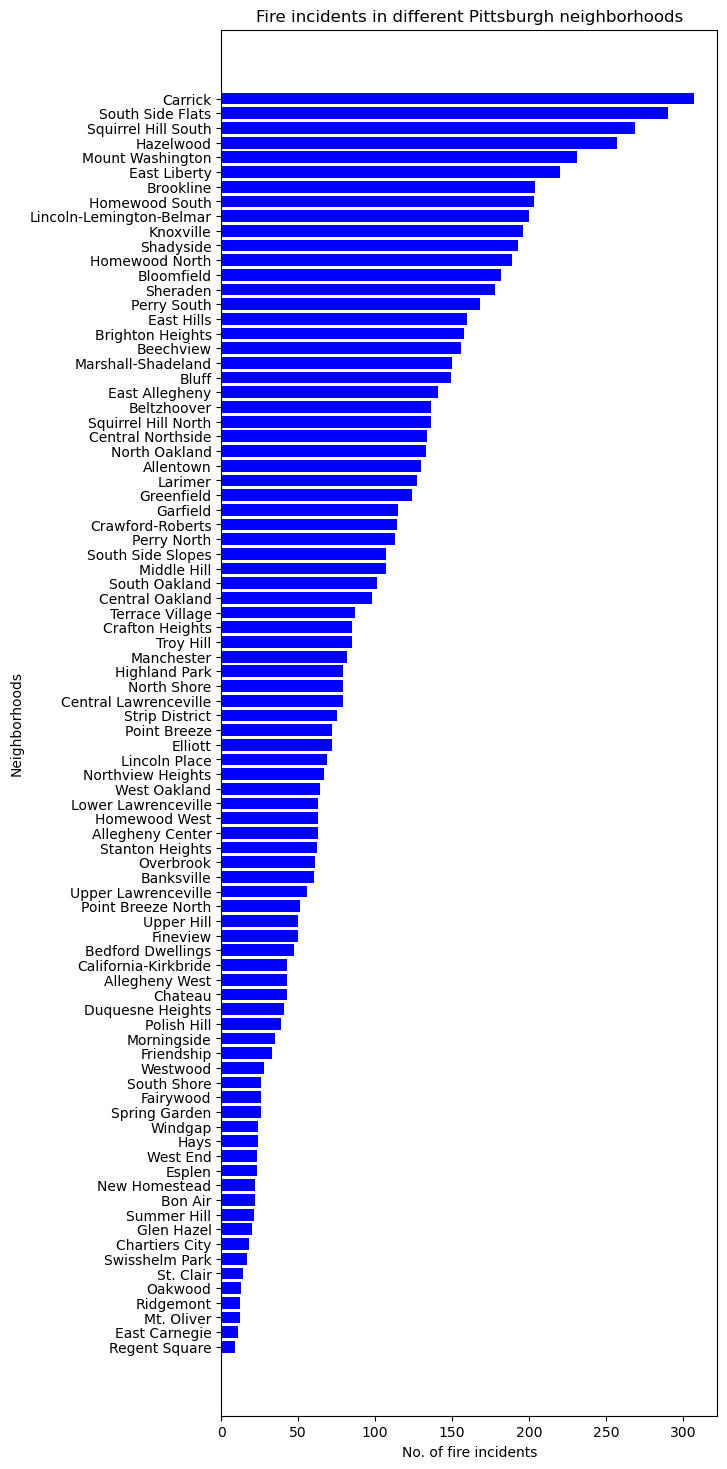

In [20]:
plt.figure().set_figheight(18)

neighborhoods = list(data.keys())
numOfIncidents = list(data.values())

plt.barh(neighborhoods, numOfIncidents, color = "blue" )

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents")
plt.title("Fire incidents in different Pittsburgh neighborhoods")
plt.show()

Now it would be easy to just take this data and make conclusions but it is important to consider context. Here's a recalculated bar chart with 

In [ ]:
plt.figure().set_figwidth(5)
plt.figure().set_figheight(18)


neighborhoods_per_capita = list(data_per_capita.keys())
numOfIncidentsPerCapita = list(data_per_capita.values())
plt.barh(neighborhoods, numOfIncidentsPerCapita, color = "red")

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents per capita")
plt.title("Fire incidents in different Pittsburgh neighborhoods, per capita")
plt.show()

## Fire Ranks

In [30]:
# Grading
rank = len(neighborhoods)

fire_ranks = {}

for n in neighborhoods:
    fire_ranks[n] = rank / len(neighborhoods)
    rank -= 1

rank = len(neighborhoods_per_capita)

fire_ranks_per_capita = {}

for n in neighborhoods_per_capita:
    fire_ranks_per_capita[n] = rank / len(neighborhoods_per_capita)
    rank -= 1




# Affordability

In [91]:
from collections import OrderedDict
neighborhood_property_values = pd.read_csv("./neighborhood-property-values.csv", low_memory=False)

pittsburgh_property_values = neighborhood_property_values[neighborhood_property_values["City"] == "Pittsburgh"]
pittsburgh_property_values = pittsburgh_property_values[["RegionName", *pd.date_range(start="2020-01-31", end="2024-10-31", freq="ME").strftime('%Y-%m-%d')]]

# Filter out none fire neighborhoods

# pittsburgh_property_values = pittsburgh_property_values[pittsburgh_property_values["RegionName"].isin(normalized_neighborhoods)]

mean_prices = {}
idx = 0
for row in pittsburgh_property_values.iterrows():
    hood = pittsburgh_property_values.iloc[idx, 0]
    mean = pittsburgh_property_values.iloc[idx, 1:].mean()
    mean_prices[hood] = float("{:.2f}".format(mean))
    idx += 1
    

mean_prices_data = OrderedDict(sorted(mean_prices.items(), key=lambda item: item[1]))

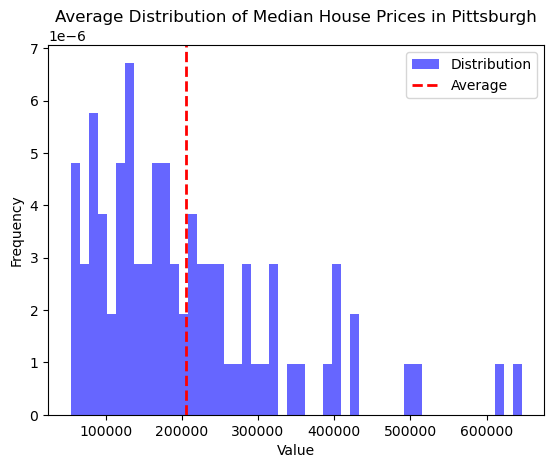

Average median house price: $205907.17


In [94]:
data = list(mean_prices_data.values())

average = np.mean(data)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Distribution')
plt.axvline(average, color='r', linestyle='dashed', linewidth=2, label='Average')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Distribution of Median House Prices in Pittsburgh')
plt.legend()
plt.show()

print(f"Average median house price: ${average:.2f}")

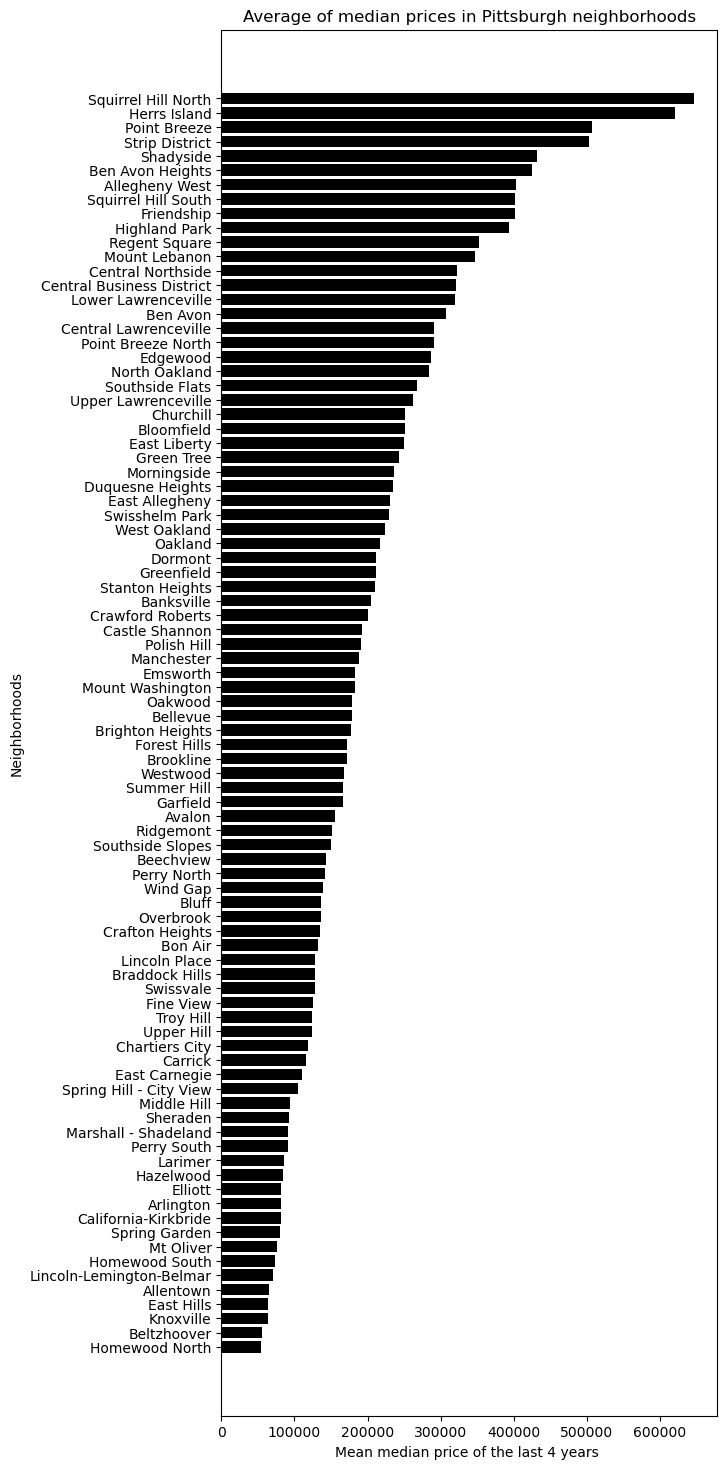

In [88]:
plt.figure().set_figheight(18)

neighborhoods = list(mean_prices_data.keys())
mean_price = list(mean_prices_data.values())

plt.barh(neighborhoods, mean_price, color = "black" )

plt.ylabel("Neighborhoods")
plt.xlabel("Mean median price of the last 4 years ")
plt.title("Average of median prices in Pittsburgh neighborhoods")
plt.show()

In [84]:
# Grading

# Grading
rank = len(neighborhoods)

affordability_ranks = {}
for n in neighborhoods:
    affordability_ranks[n] = rank / len(neighborhoods)
    rank -= 1


{'Homewood North': 1.0,
 'Beltzhoover': 0.9886363636363636,
 'Knoxville': 0.9772727272727273,
 'East Hills': 0.9659090909090909,
 'Allentown': 0.9545454545454546,
 'Lincoln-Lemington-Belmar': 0.9431818181818182,
 'Homewood South': 0.9318181818181818,
 'Mt Oliver': 0.9204545454545454,
 'Spring Garden': 0.9090909090909091,
 'California-Kirkbride': 0.8977272727272727,
 'Arlington': 0.8863636363636364,
 'Elliott': 0.875,
 'Hazelwood': 0.8636363636363636,
 'Larimer': 0.8522727272727273,
 'Perry South': 0.8409090909090909,
 'Marshall - Shadeland': 0.8295454545454546,
 'Sheraden': 0.8181818181818182,
 'Middle Hill': 0.8068181818181818,
 'Spring Hill - City View': 0.7954545454545454,
 'East Carnegie': 0.7840909090909091,
 'Carrick': 0.7727272727272727,
 'Chartiers City': 0.7613636363636364,
 'Upper Hill': 0.75,
 'Troy Hill': 0.7386363636363636,
 'Fine View': 0.7272727272727273,
 'Swissvale': 0.7159090909090909,
 'Braddock Hills': 0.7045454545454546,
 'Lincoln Place': 0.6931818181818182,
 'Bon 

# Crime

In [45]:
citations_data = pd.read_csv('non-traffic-citations.csv')

citations_data.info()
#citations_data.head()

#drop rows with missing OFFENSES or NEIGHBORHOOD data (if applicable)
citations_data = citations_data.dropna(subset=['OFFENSES', 'NEIGHBORHOOD'])

#standardize the OFFENSES column (extract the main offense name before the first parenthesis)
citations_data['MAIN_OFFENSE'] = citations_data['OFFENSES'].str.split().str[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16295 non-null  int64  
 1   PK                     16295 non-null  int64  
 2   CCR                    16295 non-null  object 
 3   GENDER                 16232 non-null  object 
 4   RACE                   16214 non-null  object 
 5   AGE                    16223 non-null  float64
 6   CITEDTIME              16295 non-null  object 
 7   INCIDENTLOCATION       16295 non-null  object 
 8   OFFENSES               16295 non-null  object 
 9   NEIGHBORHOOD           15379 non-null  object 
 10  ZONE                   16295 non-null  object 
 11  INCIDENTTRACT          15383 non-null  object 
 12  COUNCIL_DISTRICT       14453 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14453 non-null  float64
 14  X                      14493 non-null  float64
 15  Y 

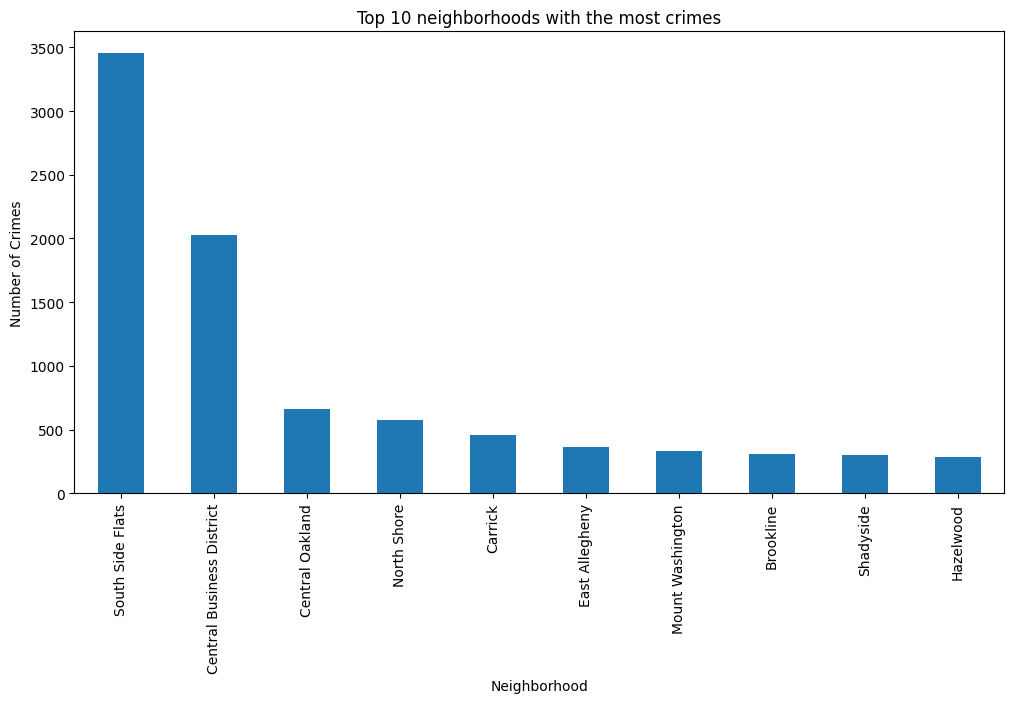

In [43]:
#count crimes by neighborhood
crime_counts_by_neighborhood = citations_data.groupby('NEIGHBORHOOD')['OFFENSES'].count().sort_values(ascending=False)

#count crimes by offense type
offense_counts = citations_data['MAIN_OFFENSE'].value_counts()

#plot crimes by neighborhood
crime_counts_by_neighborhood.head(10).plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 10 neighborhoods with the most crimes'
)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.show()


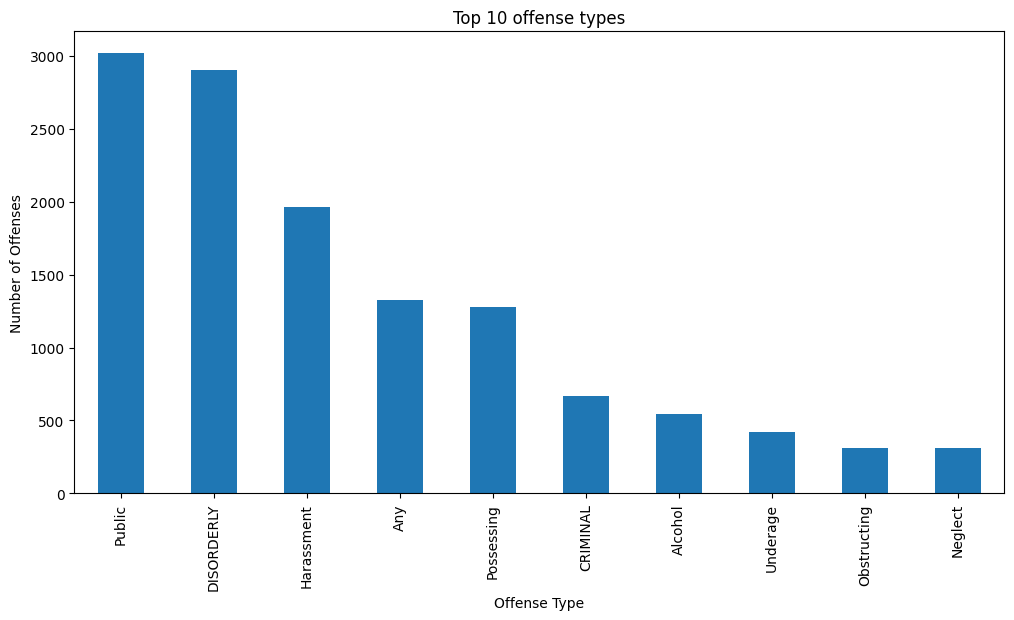

In [46]:
#plot top 10 offense types
offense_counts.head(10).plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 10 offense types'
)
plt.xlabel('Offense Type')
plt.ylabel('Number of Offenses')
plt.show()


# Mobility

In [47]:
traffic_data = pd.read_csv('traffic-count-data.csv')

traffic_data.info()
#traffic_data.head()

#clean the data
#convert average_daily_car_traffic to numeric, coercing errors to NaN
traffic_data['average_daily_car_traffic'] = pd.to_numeric(traffic_data['average_daily_car_traffic'], errors='coerce')

#drop rows with missing or invalid traffic data
traffic_data = traffic_data.dropna(subset=['average_daily_car_traffic'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         420 non-null    int64  
 1   id                          420 non-null    int64  
 2   device_id                   420 non-null    int64  
 3   record_oid                  375 non-null    float64
 4   count_start_date            367 non-null    object 
 5   count_end_date              335 non-null    object 
 6   average_daily_car_traffic   286 non-null    float64
 7   average_daily_bike_traffic  7 non-null      float64
 8   counter_number              268 non-null    object 
 9   counter_type                364 non-null    object 
 10  speed_limit                 261 non-null    float64
 11  max_speed                   91 non-null     float64
 12  median_speed                298 non-null    float64
 13  percent_over_limit          241 non

In [48]:
#group by neighborhood and find the minimum average daily car traffic
min_traffic_by_neighborhood = traffic_data.groupby('neighborhood')['average_daily_car_traffic'].min()

#sort the results to identify neighborhoods with the least traffic
min_traffic_sorted = min_traffic_by_neighborhood.sort_values()

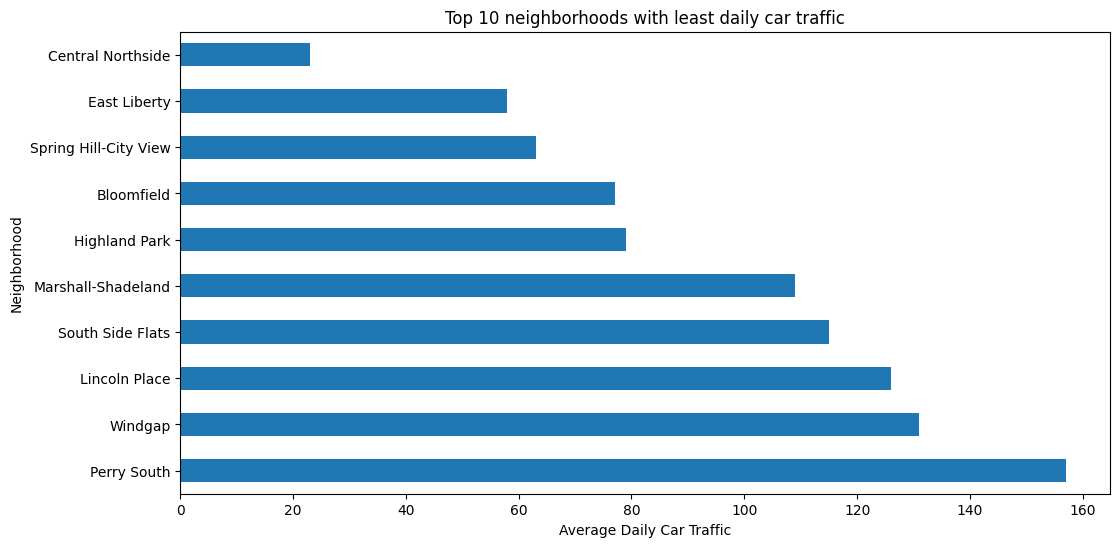

In [50]:
#plot the top 10 neighborhoods with the least daily car traffic
min_traffic_sorted.head(10).plot(
    kind='barh',
    figsize=(12, 6),
    title='Top 10 neighborhoods with least daily car traffic'
)
plt.xlabel('Average Daily Car Traffic')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis() #invert y-axis for better readability
plt.show()